In [48]:
# codecs can set the read format with different language
import codecs

In [49]:
# read the file, 'r' means read, 'utf-8' is a Chinese coding
file = codecs.open('SogouQ.mini', 'r', 'utf-8')

### Calculate mean from file

In [50]:
# we want to calculate the mean of column 5
vSum = 0
rowCount = 0
line = file.readline() # one time only read one line
while line:
    cols = line.split("\t")
    clickLocation = cols[4]
    vSum = vSum+int(clickLocation)
    line = file.readline() # read a new line
    rowCount = rowCount + 1
file.close()

In [51]:
mean = vSum/rowCount
mean

1.4335

### Calculate median from file

In [52]:
file = codecs.open('SogouQ.mini', 'r', 'utf-8')

In [53]:
# we want to calculate the median of column 5
kv = dict() # create empty dictionary is not dict{}
rowCount = 0
line = file.readline() # one time only read one line
while line:
    cols = line.split("\t")
    clickLocation = int(cols[4])
    count = 0
    if clickLocation in kv:
        count=kv[clickLocation] # clickLocation is a variable, so it is not kv['clickLocation']
    count=count+1
    kv[clickLocation]=count
    
    rowCount = rowCount + 1
    line = file.readline() # read a new line

file.close()

In [54]:
kv

{1: 1471, 2: 337, 3: 115, 4: 43, 5: 17, 6: 8, 7: 4, 8: 2, 9: 2, 10: 1}

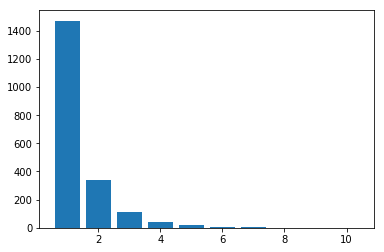

In [55]:
import matplotlib.pyplot as plt
plt.bar(kv.keys(), kv.values())
plt.show()

In [56]:
# sort the keys
keys = sorted(kv.keys())

In [57]:
# maybe median position has two numbers
index0 = 0
index1 = 0
value0 = 0
value1 = 0
vSum = 0
if rowCount%2 == 1:
    index0 = rowCount/2
    index1 = rowCount/2
else:
    index0 = rowCount/2
    index1 = rowCount/2 + 1
for k in keys:
    vSum = vSum + kv[k]
    if vSum >= index0:
        value0 = k
    if vSum >= index1:
        value1 = k
        break
median = (value0+value1)/2
median

1.0

### Calculate mode and range from file, mode is the most frequency number

In [58]:
file = codecs.open('SogouQ.mini', 'r', 'utf-8')
kv = dict() # create empty dictionary is not dict{}
rowCount = 0
line = file.readline() # one time only read one line
while line:
    cols = line.split("\t")
    clickLocation = int(cols[4])
    count = 0
    if clickLocation in kv:
        count=kv[clickLocation] # clickLocation is a variable, so it is not kv['clickLocation']
    count=count+1
    kv[clickLocation]=count
    
    rowCount = rowCount + 1
    line = file.readline() # read a new line

file.close()

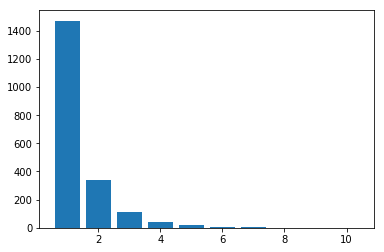

In [59]:
import matplotlib.pyplot as plt
plt.bar(kv.keys(), kv.values())
plt.show()

In [60]:
# get the key that has the max values
max(kv, key=kv.get)

1

In [61]:
# calculate the range
range_num = max(kv.keys()) - min(kv.keys())
range_num

9

### Calculate the variance

In [66]:
# first calculate the mean
file = codecs.open('SogouQ.mini', 'r', 'utf-8')
vSum = 0
rowCount = 0
line = file.readline() # one time only read one line
while line:
    cols = line.split("\t")
    clickLocation = cols[4]
    vSum = vSum+int(clickLocation)
    line = file.readline() # read a new line
    rowCount = rowCount + 1
file.close()

In [67]:
# then calculate the variance
mean = vSum/rowCount
dSum = 0
file = codecs.open('SogouQ.mini', 'r', 'utf-8')
line = file.readline()
while line:
    cols = line.split("\t")
    clickLocation = int(cols[4])
    dSum = dSum + (clickLocation-mean)**2
    line = file.readline()

file.close()
variance = dSum/rowCount # rowCount has been calculated above

In [68]:
variance

0.86557774999999

In [69]:
# calculate the standard deviation
sd = variance**0.5
sd

0.9303643103644884